In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/asus/Downloads/insurance.csv")
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [4]:
df.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [5]:
df.describe(include='all')

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


## Key insights from the summary statistics:

* **Age:** The average age is around 42, with most individuals aged between 30 and 53.

### Medical Conditions:
* **Diabetes and Blood Pressure Problems** are common, with around **42% and 47%** of individuals, respectively.
* **Transplants and Chronic Diseases** are less common, affecting about **5.6% and 18%** of individuals.
* **Known Allergies and Family Cancer History** are present in **21% and 12%** of the sample, respectively.
### Physical Attributes:
* **Average Height and Weight** are **168 cm and 77 kg**, with considerable variation in weight.
* **Number of Major Surgeries:** Most individuals had no or one major surgery, with a few having up to three.
### Premium Price:
* The average premium is around 24,337, with a median of 23,000.
* Premiums range from 15,000 to 40,000, with a higher interquartile range (21,000 to 28,000).

# Correlation Analysis

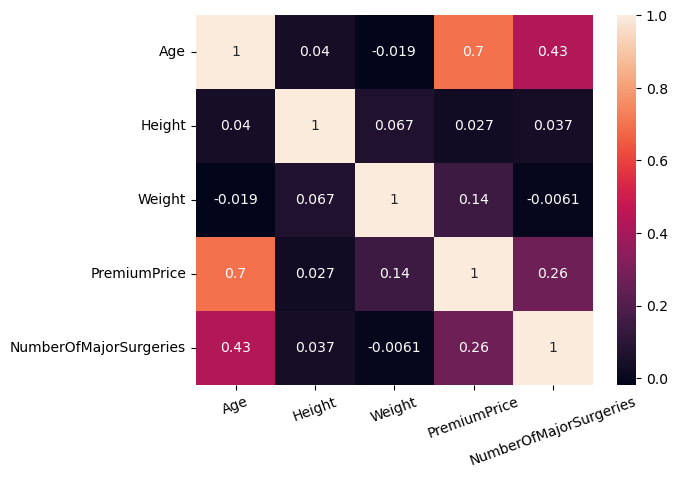

In [6]:
num_col = ['Age', 'Height', 'Weight', 'PremiumPrice','NumberOfMajorSurgeries' ]
sns.heatmap(df[num_col].corr(), annot=True)
plt.xticks(rotation=20)
plt.show()

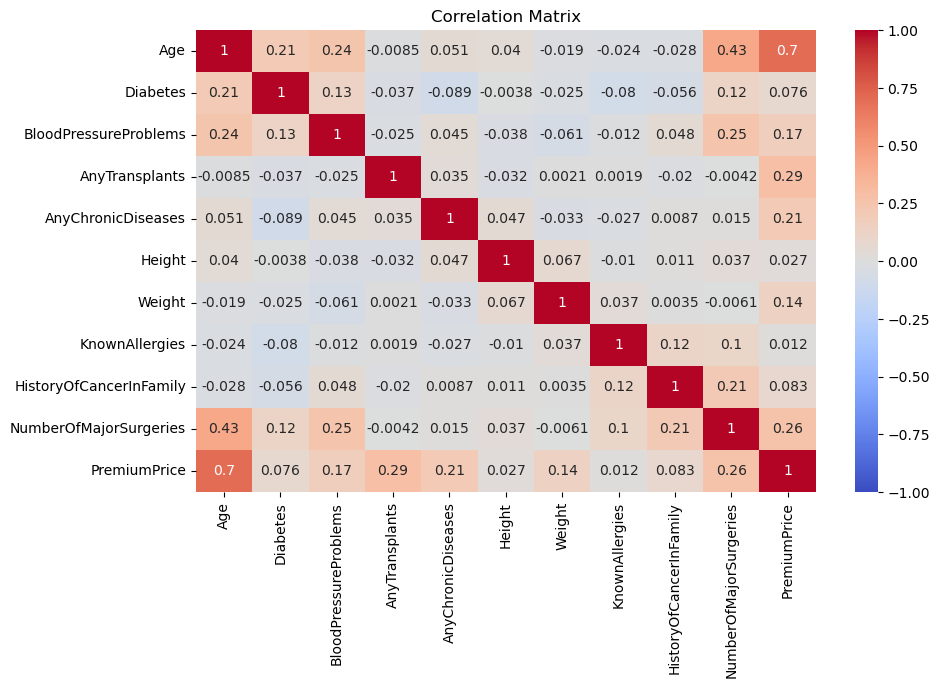

In [7]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<span style="font-size:18px">Target variable **'PremiumPrice'** has the strongest direct correlation with **'Age'**, followed by the second & third highest correlation with the columns **'AnyTransplants'** and **'NumberOfMajorSurgeries'** respectively.</span>

# Distribution Analysis

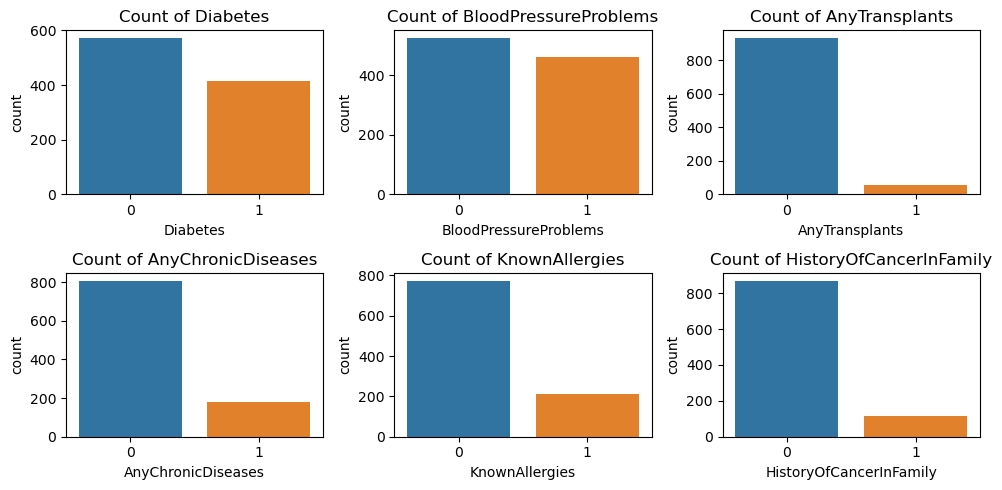

In [8]:
fig, axes = plt.subplots(2,3, figsize = (10, 5))
sns.countplot(df['Diabetes'], ax=axes[0, 0])
axes[0,0].set_title("Count of Diabetes")

sns.countplot(df['BloodPressureProblems'], ax=axes[0, 1])
axes[0,1].set_title("Count of BloodPressureProblems")

sns.countplot(df['AnyTransplants'], ax=axes[0, 2])
axes[0,2].set_title("Count of AnyTransplants")

sns.countplot(df['AnyChronicDiseases'], ax=axes[1, 0])
axes[1,0].set_title("Count of AnyChronicDiseases")

sns.countplot(df['KnownAllergies'], ax=axes[1, 1])
axes[1,1].set_title("Count of KnownAllergies")

sns.countplot(df['HistoryOfCancerInFamily'], ax=axes[1, 2])
axes[1,2].set_title("Count of HistoryOfCancerInFamily")
plt.tight_layout()
plt.show()

## 👉 Brief insights from the plots:

* **Diabetes:** Around 42% of individuals have diabetes.
* **Blood Pressure Problems:** Almost 47% of individuals experience blood pressure issues.
* **Transplants:** Very few individuals have had any transplants.
* **Chronic Diseases:** A significant majority do not have chronic diseases.
* **Known Allergies:** A small portion of individuals report known allergies.
* **Family Cancer History:** Only a small percentage have a family history of cancer.
* These distributions indicate that while some health issues (like diabetes and blood pressure) are common, others (like transplants, chronic diseases, and family cancer history) are relatively rare in the dataset.

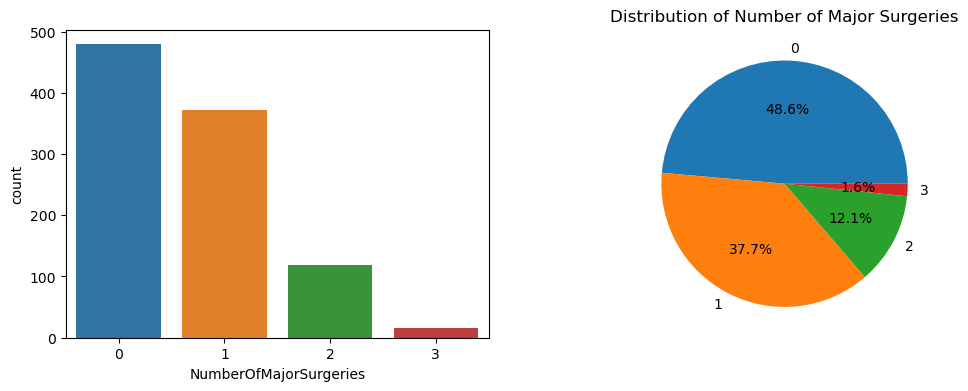

In [9]:
values = df['NumberOfMajorSurgeries'].value_counts()

fig, axes = plt.subplots(1,2, figsize = (12, 4))
sns.countplot(df['NumberOfMajorSurgeries'], ax=axes[0])

axes[1].pie(values, labels=values.index, autopct='%1.1f%%')
axes[1].set_title("Distribution of Number of Major Surgeries")
plt.show()

## 👉 Insights
* **Around 49% of people have not had any major surgeries, almost 38% of people with 1 major surgery. 12% of the cusomers have reported to have 2 major surgeries and very small portion 1.6% have had 3 major surgeries.

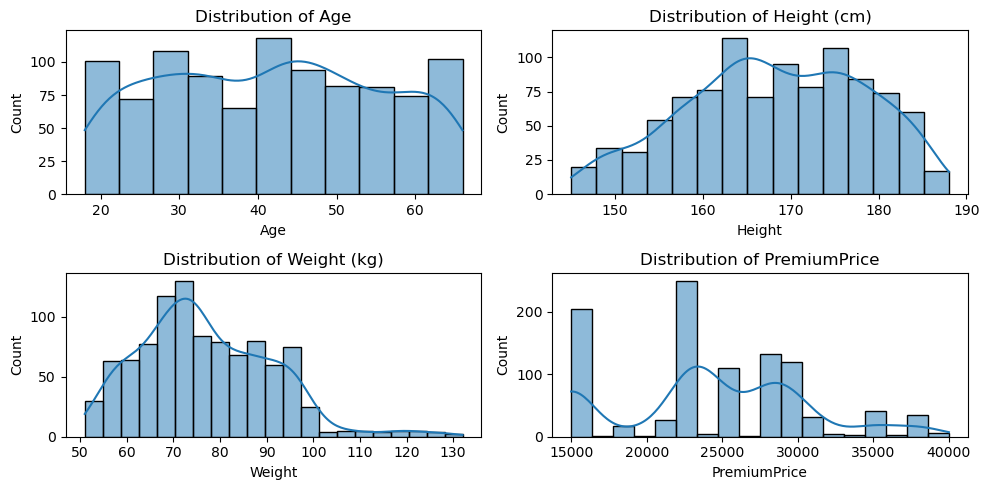

In [10]:
fig, axes = plt.subplots(2,2, figsize = (10, 5))
sns.histplot(df['Age'], ax=axes[0, 0], kde=True)
axes[0,0].set_title("Distribution of Age")

sns.histplot(df['Height'], ax=axes[0, 1], kde=True)
axes[0,1].set_title("Distribution of Height (cm)")

sns.histplot(df['Weight'], ax=axes[1, 0], kde=True)
axes[1,0].set_title("Distribution of Weight (kg)")

sns.histplot(df['PremiumPrice'], ax=axes[1, 1], kde=True)
axes[1,1].set_title("Distribution of PremiumPrice")

plt.tight_layout()
plt.show()

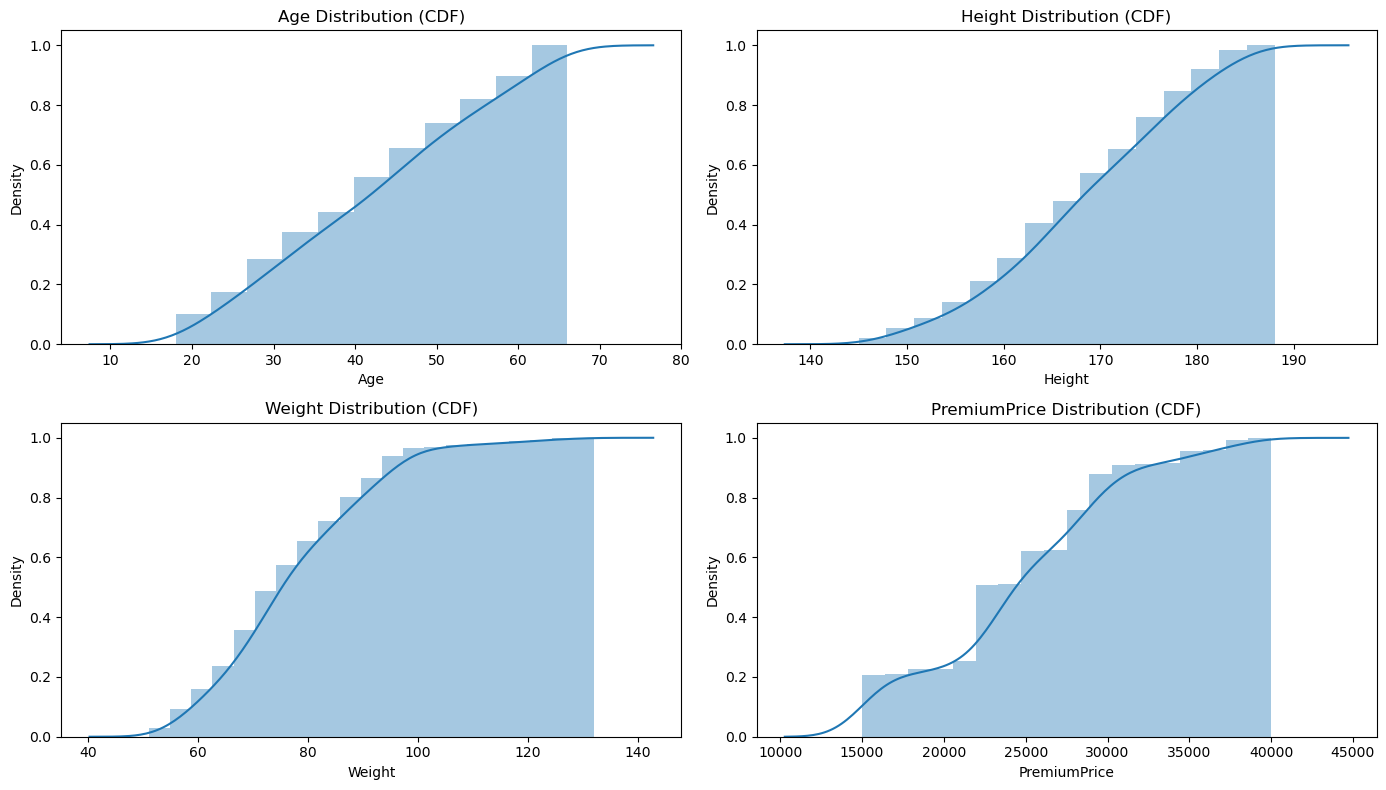

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
kwargs = {'cumulative': True}

sns.distplot(df['Age'], label = 'Age', hist_kws=kwargs, kde_kws=kwargs, ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution (CDF)')

sns.distplot(df['Height'], label = 'Height', hist_kws=kwargs, kde_kws=kwargs, ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution (CDF)')

sns.distplot(df['Weight'], label = 'Weight', hist_kws=kwargs, kde_kws=kwargs, ax=axes[1, 0])
axes[1, 0].set_title('Weight Distribution (CDF)')

sns.distplot(df['PremiumPrice'], label = 'PremiumPrice', hist_kws=kwargs, kde_kws=kwargs, ax=axes[1, 1])
axes[1, 1].set_title('PremiumPrice Distribution (CDF)')

plt.tight_layout()
plt.show()

## 👉 Insights from the above distribution plots:
* **Age :** The curve increases steadily, which suggests that the age data is distributed across a range rather than concentrated at specific values.
* **Height :** The CDF & Histogram indicate that most people have a height between 160 cm and 180 cm.
* **Weight :** The plots reveal that a large portion of the population has a weight below 100 kg. The curve levels off after 120 kg, suggesting that weights above this value are less common or outliers.
* **Premium :** The graphs suggest that premium prices are more concentrated in the lower range of 20000-30000, with fewer people paying higher premiums over 30,000.

## Checking the distribution of 'PremiumPrice' column separately in bins

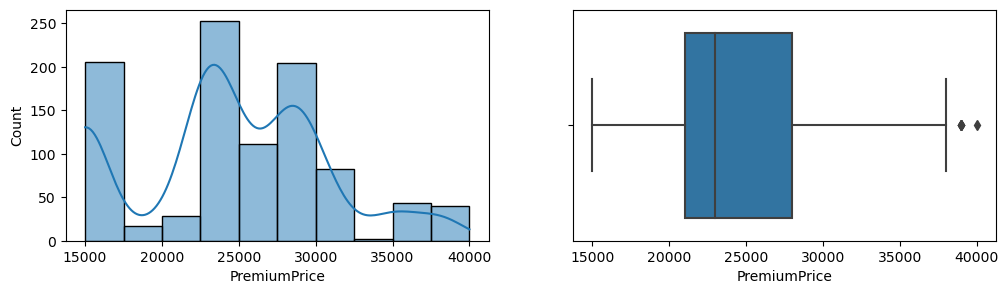

In [12]:
# Checking the distribution of 'PremiumPrice' column separately in bins
plt.figure(figsize=(12,3))

# Histogram
plt.subplot(1,2,1)
sns.histplot(df['PremiumPrice'], bins=10, kde=True)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x = df['PremiumPrice'])
plt.show()

## Checking distribution after applying log transformation 

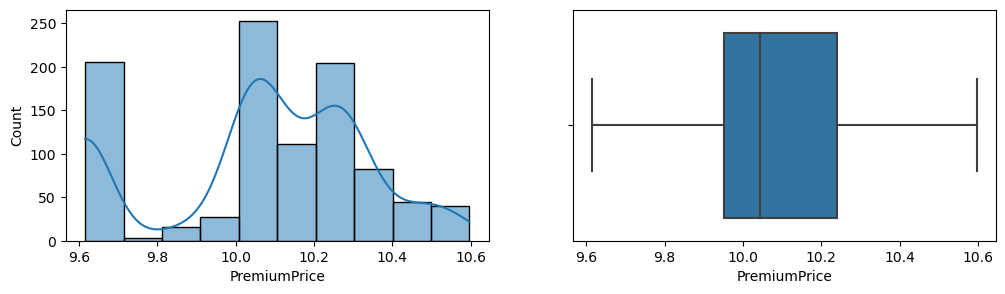

In [13]:
# Checking distribution after applying log transformation -
plt.figure(figsize=(12,3))

# Histogram
plt.subplot(1,2,1)
sns.histplot(np.log(df['PremiumPrice']), bins=10, kde=True)

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(x = np.log(df['PremiumPrice']))
plt.show()

# Outlier Detection

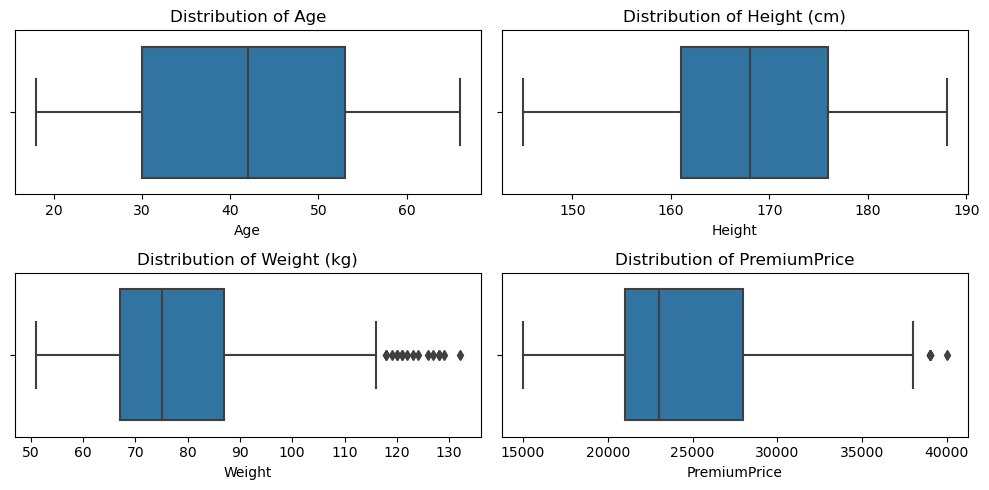

In [14]:
fig, axes = plt.subplots(2,2, figsize = (10, 5))
sns.boxplot(x = 'Age', data=df, ax=axes[0, 0])
axes[0,0].set_title("Distribution of Age")

sns.boxplot(x = 'Height', data=df, ax=axes[0, 1])
axes[0,1].set_title("Distribution of Height (cm)")

sns.boxplot(x = 'Weight', data=df, ax=axes[1, 0])
axes[1,0].set_title("Distribution of Weight (kg)")

sns.boxplot(x = 'PremiumPrice', data=df, ax=axes[1, 1])
axes[1,1].set_title("Distribution of PremiumPrice")

plt.tight_layout()
plt.show()

# 👉 <span style = font-size:18px> **There are a few people with more weight than 110 kgs, but as they are important data points for the model, considering that overweight might affect the premium price, not removing the outliers.**

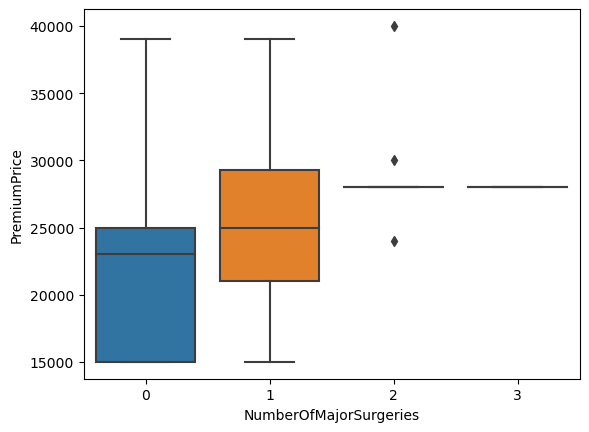

In [15]:
sns.boxplot(data=df, x='NumberOfMajorSurgeries', y= 'PremiumPrice')
plt.show()

* <span style = font-size:16px>**Median Premium Price:** Individuals with no surgeries have a lower median premium price compared to those with one surgery. This indicates a trend where having surgeries tends to increase the median premium price.
* <span style = font-size:16px>**Consistency at Higher Surgery Counts:** For individuals with 2 or 3 surgeries, the premium prices are almost the same, showing no significant variation in the median price.
* <span style = font-size:16px>**Outliers for 2 Surgeries:** Outliers appear only for individuals with 2 surgeries, indicating that some in this group have significantly higher premiums than others with similar surgery counts.

# Premium price vs Age based on different medical conditions

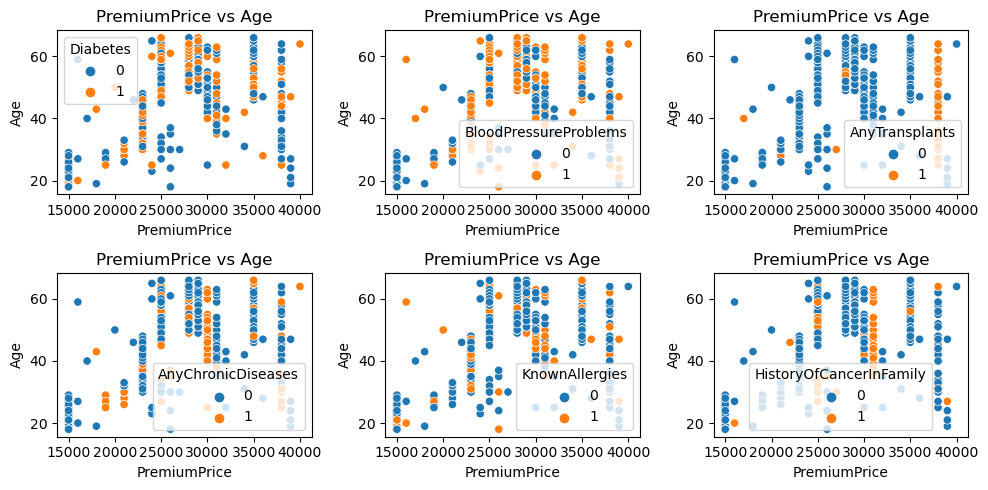

In [16]:
fig, axes = plt.subplots(2,3, figsize = (10, 5))
sns.scatterplot(x='PremiumPrice', y= 'Age', data = df, hue='Diabetes', ax=axes[0, 0])
axes[0,0].set_title("PremiumPrice vs Age")

sns.scatterplot(x='PremiumPrice', y= 'Age', data = df, hue='BloodPressureProblems', ax=axes[0,1])
axes[0,1].set_title("PremiumPrice vs Age")

sns.scatterplot(x='PremiumPrice', y= 'Age', data = df, hue='AnyTransplants', ax=axes[0,2])
axes[0,2].set_title("PremiumPrice vs Age")

sns.scatterplot(x='PremiumPrice', y= 'Age', data = df, hue='AnyChronicDiseases', ax=axes[1,0])
axes[1,0].set_title("PremiumPrice vs Age")

sns.scatterplot(x='PremiumPrice', y= 'Age', data = df, hue='KnownAllergies', ax=axes[1,1])
axes[1,1].set_title("PremiumPrice vs Age")

sns.scatterplot(x='PremiumPrice', y= 'Age', data = df, hue='HistoryOfCancerInFamily', ax=axes[1,2])
axes[1,2].set_title("PremiumPrice vs Age")

plt.tight_layout()
plt.show()

* **Any Transplants:** Those with transplants (orange) are fewer but tend to fall in the mid-to-higher premium range, indicating that transplants may contribute to increased premiums.

* **Any Chronic Diseases:** Individuals with chronic diseases (orange) are distributed across premium ranges but have a noticeable presence at higher premium prices, especially in middle-aged and older groups.

* **Known Allergies:** There is no strong correlation between known allergies and premium prices, as both groups (with and without allergies) are spread similarly across premium and age ranges.

* **History of Cancer in Family:** Those with a family history of cancer (orange) are more spread out in terms of premium prices and appear across all age groups, indicating that this factor does not significantly elevate premium prices compared to other conditions.

## Average premium price based on different medical condition separately

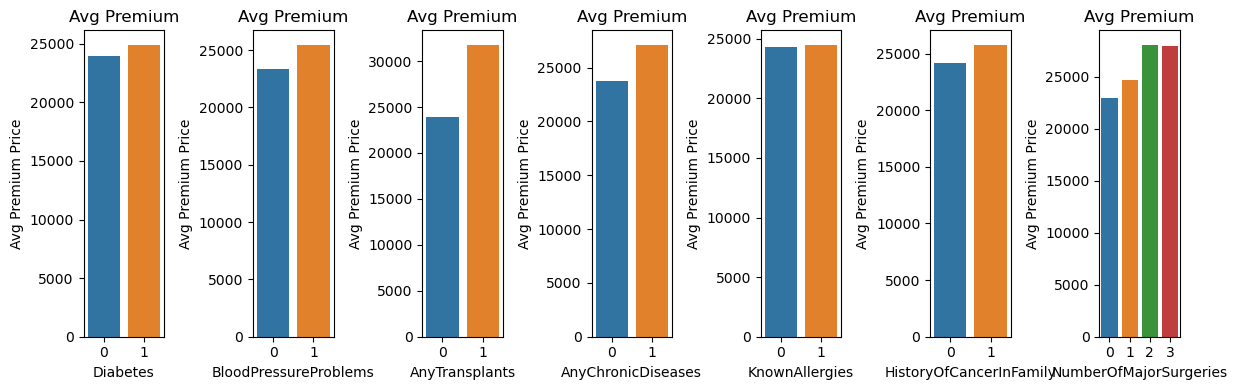

In [17]:
categorical_columns = ['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies',
                      'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

# Create a new figure
plt.figure(figsize=(12, 4))

for i, column in enumerate(categorical_columns):
    plt.subplot(1, len(categorical_columns), i + 1)
    avg_premium = df.groupby(column)['PremiumPrice'].mean().reset_index()
    sns.barplot(x=column, y='PremiumPrice', data=avg_premium)
    plt.title("Avg Premium")
    plt.xlabel(column)
    plt.ylabel('Avg Premium Price')

plt.tight_layout()
plt.show()

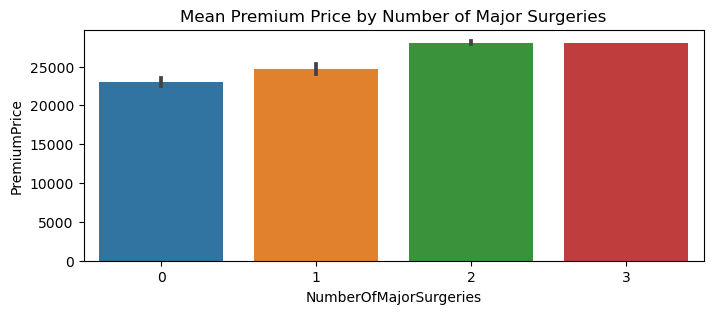

In [18]:
plt.figure(figsize=(8,3))
sns.barplot(x='NumberOfMajorSurgeries', y='PremiumPrice', data=df, estimator=np.mean)
plt.title('Mean Premium Price by Number of Major Surgeries')
plt.show()

## Aggregating the total Premium Price based on the different medical conditions 
['Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries']

In [19]:
# Diabetes
pd.DataFrame(df.groupby('Diabetes')['PremiumPrice'].describe())

,count,mean,std,min,25%,50%,75%,max
Diabetes,,,,,,,,
0,572.0,23931.818182,6562.956719,15000.0,19000.0,23000.0,29000.0,39000.0
1,414.0,24896.135266,5746.150162,15000.0,23000.0,25000.0,28000.0,40000.0


# Q-1: Is there a significant difference between the premium price for Diabetic & Non-diabetic people?
#### **Step 1:** Defining the null and alternate hypothesis

$H_0:$ The premium for diabetic and non-diabetic people is similar.

$H_a:$ The premium for diabetic and non-diabetic people is different.

Let $\mu_1$ and $\mu_2$ be the average premium for diabetic and non-diabetic people respectively.

Mathematically, the above formulated hypothesis can be written as:

$H_0: \mu_1 = \mu_2$

$H_a: \mu_1 > \mu_2$


**NOTE:**
* A t-test looks at two sets of data that are different from each other, with no standard deviation or variance.

* A z-test views the averages of data sets that are different from each other but have the standard deviation or variance given.

* The t test as compared with z test has its advantage for small sample comparison. As n increases, t approaches to z. The advantage of t test disappears, and t distribution simply becomes z distribution. 

* In other words, with large n, t test is just close to z test and one doen't lose anything to continue to use t test. 

* In the past, for convenience, we use z table when n > 30.  We don't have to do it anymore. 

* In fact, all statistical packages use t test even n is large. This is easy, convenience with computer programming, and is correct. All statistical packages are good references.

## Checking the normality of variable Premium price to fulfil the assumption of T-test

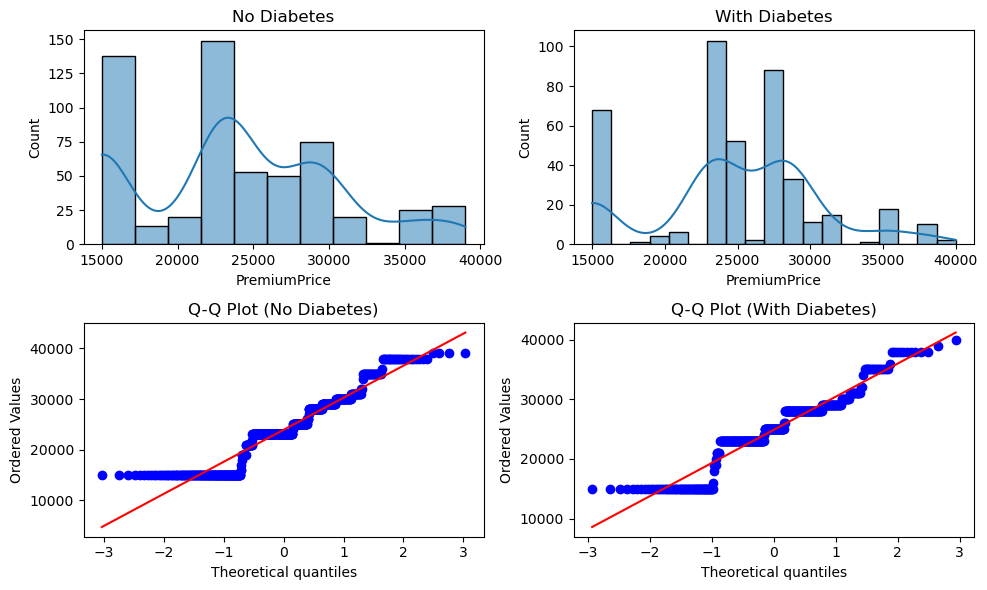

In [20]:
import scipy.stats as stats

premium_no_diabetes = df[df['Diabetes'] == 0]['PremiumPrice']
premium_with_diabetes = df[df['Diabetes'] == 1]['PremiumPrice']

# Plot histograms and Q-Q plots
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

# Histograms
sns.histplot(premium_no_diabetes, kde=True, ax=axes[0, 0]).set(title='No Diabetes')
sns.histplot(premium_with_diabetes, kde=True, ax=axes[0, 1]).set(title='With Diabetes')

# Q-Q Plots
stats.probplot(premium_no_diabetes, dist="norm", plot=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot (No Diabetes)")
stats.probplot(premium_with_diabetes, dist="norm", plot=axes[1, 1])
axes[1, 1].set_title("Q-Q Plot (With Diabetes)")

plt.tight_layout()
plt.show()


In [21]:
# Shapiro-Wilk test for normality
shapiro_no_diabetes = stats.shapiro(premium_no_diabetes)
shapiro_with_diabetes = stats.shapiro(premium_with_diabetes)

print("Shapiro-Wilk Test (No Diabetes):", shapiro_no_diabetes)
print("Shapiro-Wilk Test (With Diabetes):", shapiro_with_diabetes)

Shapiro-Wilk Test (No Diabetes): ShapiroResult(statistic=0.9206765294075012, pvalue=8.945638040427814e-17)
Shapiro-Wilk Test (With Diabetes): ShapiroResult(statistic=0.9228849411010742, pvalue=9.5317796624389e-14)


### Central Limit Theorem -

* According to this theorem, the distribution of sample means approximates a normal distribution as the sample size gets larger, regardless of the population's distribution. 

* In other words, if we find the mean of a large number of independent random variables, the mean
will follow a normal distribution, irrespective of the distribution of the original variables.

* In practice, sample sizes equal to or greater than 30-40 are often considered sufficient for the CLT to hold.

Hence, the sample size being large enough, we don't need to worry about the non-normality of distribution of the data set in hand before applying the tests.

Eventually, as the sample size gets larger, the distribution of sample means will fall into a normal or near normal shape.

### Hence we can use either of the tests i.e. T-test or ANOVA or Kruskal-Wallis H-Test


In [22]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(premium_with_diabetes, premium_no_diabetes, alternative = 'greater', equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)

# Interpretation
if p_value < 0.05:
    print("There is a significant difference in mean PremiumPrice between the two groups.")
else:
    print("There is no significant difference in mean PremiumPrice between the two groups.")

T-statistic: 2.4489285982890396
P-value: 0.0072540714973159046
There is a significant difference in mean PremiumPrice between the two groups.


## The premium price is more for diabetic. It is statistically proven. Hence this column diabetes is an important predictor to build an ML model for prediction
## t-statistic of 2.44 suggests that the difference between the two group means is large enough to be statistically significant 

In [23]:
# BloodPressureProblems
pd.DataFrame(df.groupby('BloodPressureProblems')['PremiumPrice'].describe())

,count,mean,std,min,25%,50%,75%,max
BloodPressureProblems,,,,,,,,
0,524.0,23356.870229,6605.847295,15000.0,15000.0,23000.0,28000.0,39000.0
1,462.0,25448.051948,5619.584064,15000.0,23000.0,25000.0,28000.0,40000.0


# Q-2: Is there a significant difference between the premium price for BP & Non-BP people?

#### Defining the null and alternate hypothesis

𝐻0:𝜇_bp = 𝜇_non_bp
 

𝐻𝑎:𝜇_bp > 𝜇_non_bp

In [24]:
from IPython.display import display, HTML

def stat_test(p_value, alpha=0.05):
    if p_value < alpha:
        display(HTML("<span style='font-size:18px; font-weight:bold;'>There is a significant\
                     difference in mean PremiumPrice between the groups.</span>"))
    else:
        display(HTML("<span style='font-size:18px; font-weight:bold;'>There is no significant\
        difference in mean PremiumPrice between the groups.</span>"))

In [25]:
no_bp_premium = df[df['BloodPressureProblems'] == 0]['PremiumPrice']
bp_premium = df[df['BloodPressureProblems'] == 1]['PremiumPrice']

t_stat, p_value = ttest_ind(bp_premium, no_bp_premium, alternative = 'greater', equal_var=False)

stat_test(p_value, alpha=0.05)

In [26]:
# AnyTransplants'
pd.DataFrame(df.groupby('AnyTransplants')['PremiumPrice'].describe())

,count,mean,std,min,25%,50%,75%,max
AnyTransplants,,,,,,,,
0,931.0,23897.959184,5741.502007,15000.0,21000.0,23000.0,28000.0,40000.0
1,55.0,31763.636364,9213.443552,15000.0,28000.0,38000.0,38000.0,38000.0


# Q-3: Is there a significant difference between the premium price for Transplant & Non-Transplant people?

#### Defining the null and alternate hypothesis

𝐻0:𝜇_tsp = 𝜇_non_tsp
 

𝐻𝑎:𝜇_tsp > 𝜇_non_tsp

In [27]:
no_tsp_premium = df[df['AnyTransplants'] == 0]['PremiumPrice']
tsp_premium = df[df['AnyTransplants'] == 1]['PremiumPrice']

t_stat, p_value = ttest_ind(tsp_premium, no_tsp_premium, alternative = 'greater', equal_var=False)

stat_test(p_value, alpha=0.05)

In [28]:
# AnyChronicDiseases'
pd.DataFrame(df.groupby('AnyChronicDiseases')['PremiumPrice'].describe())

,count,mean,std,min,25%,50%,75%,max
AnyChronicDiseases,,,,,,,,
0,808.0,23725.247525,6322.106231,15000.0,15750.0,23000.0,28000.0,39000.0
1,178.0,27112.359551,5056.602111,18000.0,23000.0,28000.0,30000.0,40000.0


# Q-4: Is there a significant difference between the premium price for Chronic Disease & Non-Chronic Disease people?

#### Defining the null and alternate hypothesis

𝐻0:𝜇_chronic = 𝜇_non_chronic
 

𝐻𝑎:𝜇_chronic > 𝜇_non_chronic

In [29]:
no_chronic_premium = df[df['AnyChronicDiseases'] == 0]['PremiumPrice']
chronic_premium = df[df['AnyChronicDiseases'] == 1]['PremiumPrice']

t_stat, p_value = ttest_ind(chronic_premium, no_chronic_premium, alternative = 'greater', equal_var=False)

stat_test(p_value, alpha=0.05)

In [30]:
# KnownAllergies'
pd.DataFrame(df.groupby('KnownAllergies')['PremiumPrice'].describe())

,count,mean,std,min,25%,50%,75%,max
KnownAllergies,,,,,,,,
0,774.0,24297.157623,6165.636707,15000.0,21000.0,23000.0,28000.0,40000.0
1,212.0,24481.132075,6553.796529,15000.0,21000.0,23000.0,29000.0,39000.0


# Q-5: Is there a significant difference between the premium price for Allergic & Non-Allergic people?

#### Defining the null and alternate hypothesis

𝐻0:𝜇_Allergic = 𝜇_non_Allergic
 

𝐻𝑎:𝜇_Allergic > 𝜇_non_Allergic

In [31]:
no_Allergic_premium = df[df['KnownAllergies'] == 0]['PremiumPrice']
Allergic_premium = df[df['KnownAllergies'] == 1]['PremiumPrice']

t_stat, p_value = ttest_ind(Allergic_premium, no_Allergic_premium, alternative = 'greater', equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)
stat_test(p_value, alpha=0.05)

T-statistic: 0.36668963110854214
P-value: 0.35704623166186933


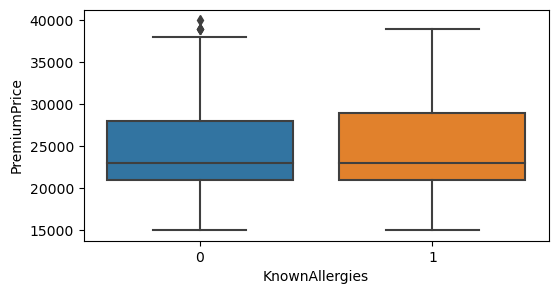

In [32]:
plt.figure(figsize=(6,3))

sns.boxplot(x='KnownAllergies', y='PremiumPrice', data=df)
plt.show()

## There is no significant diferrence in the mean premium price for people with allergies and no-allergy, t_stat is also less than 1.96 (a bechmark) which supports the same. Median is also same (Boxplot)
### The predictor does not make significant difference, we may or may not keep this variable in model traing depending on further analysis

In [33]:
corr_matrix = df.corr()
print(corr_matrix['Height'].sort_values(ascending=False))

Height                     1.000000
Weight                     0.066946
AnyChronicDiseases         0.047419
Age                        0.039879
NumberOfMajorSurgeries     0.037289
PremiumPrice               0.026910
HistoryOfCancerInFamily    0.010549
Diabetes                  -0.003783
KnownAllergies            -0.010200
AnyTransplants            -0.031543
BloodPressureProblems     -0.037926
Name: Height, dtype: float64


In [34]:
# HistoryOfCancerInFamily'
pd.DataFrame(df.groupby('HistoryOfCancerInFamily')['PremiumPrice'].describe())

,count,mean,std,min,25%,50%,75%,max
HistoryOfCancerInFamily,,,,,,,,
0,870.0,24147.126437,6117.864935,15000.0,21500.0,23000.0,28000.0,40000.0
1,116.0,25758.620690,7017.519306,15000.0,21000.0,28000.0,31000.0,39000.0


# Q-6: Is there a significant difference between the premium price for cancer history & No-cancer history people?

#### Defining the null and alternate hypothesis

𝐻0:𝜇_Acancer = 𝜇_non_cancer
 

𝐻𝑎:𝜇_cancer > 𝜇_non_cancer

In [35]:
no_cancer_premium = df[df['HistoryOfCancerInFamily'] == 0]['PremiumPrice']
cancer_premium = df[df['HistoryOfCancerInFamily'] == 1]['PremiumPrice']

t_stat, p_value = ttest_ind(cancer_premium, no_cancer_premium, alternative = 'greater', equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)
stat_test(p_value, alpha=0.05)

T-statistic: 2.3567519547641984
P-value: 0.009914113264821615


In [36]:
# NumberOfMajorSurgeries'
pd.DataFrame(df.groupby('NumberOfMajorSurgeries')['PremiumPrice'].describe())

,count,mean,std,min,25%,50%,75%,max
NumberOfMajorSurgeries,,,,,,,,
0,479.0,22968.684760,6356.976577,15000.0,15000.0,23000.0,25000.0,39000.0
1,372.0,24741.935484,6593.966409,15000.0,21000.0,25000.0,29250.0,39000.0
2,119.0,28084.033613,1175.886481,24000.0,28000.0,28000.0,28000.0,40000.0
3,16.0,28000.000000,0.000000,28000.0,28000.0,28000.0,28000.0,28000.0


# Q-7: Is there a significant difference between the premium price for people with different number of major surgeries?

#### Defining the null and alternate hypothesis

$H_0:$ The average premium prices for people with different number of major surgeries are equal.

$H_a:$ The average premium prices for people with different number of major surgeries are not equal.

In [37]:
surgery_0 = df[df['NumberOfMajorSurgeries']==0]['PremiumPrice']
surgery_1 = df[df['NumberOfMajorSurgeries']==1]['PremiumPrice']
surgery_2 = df[df['NumberOfMajorSurgeries']==2]['PremiumPrice']
surgery_3 = df[df['NumberOfMajorSurgeries']==3]['PremiumPrice']

In [38]:
from scipy.stats import f_oneway

test_stat, p_value = f_oneway(surgery_0, surgery_1, surgery_2, surgery_3)
stat_test(p_value, alpha=0.05)

In [39]:
from scipy.stats import kruskal

h_statistic, p_value = kruskal(surgery_0, surgery_1, surgery_2, surgery_3)
stat_test(p_value, alpha=0.05)

# Q-8: Is there an association between 2 categorical variable i.e.  'AnyChronicDiseases' and 'HistoryOfCancerInFamily'

#### Define the null and alternate hypothesis

$H_0:$ AnyChronicDiseases is independent of HistoryOfCancerInFamily.

$H_a:$ AnyChronicDiseases depends on the variable HistoryOfCancerInFamily

In [40]:
# function to accpet or rejct null hypothesis
def check_chi_value(p_value, alpha=0.05):
    if p_value < 0.05:
        print('\033[1m=== THERE IS AN ASSOCIATION BETWEEN BOTH THE CATEGORICAL VARIABLES ===\033[0m')
    else: 
        print('\033[1m=== BOTH THE CATEGORICAL VARIABLES ARE INDEPENDENT ===\033[0m')
    print(f"Chi-Square test result:  p-value = {p_value}")

In [41]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['AnyChronicDiseases'], df['HistoryOfCancerInFamily'])

contingency_table

HistoryOfCancerInFamily,0,1
AnyChronicDiseases,,
0,714,94
1,156,22


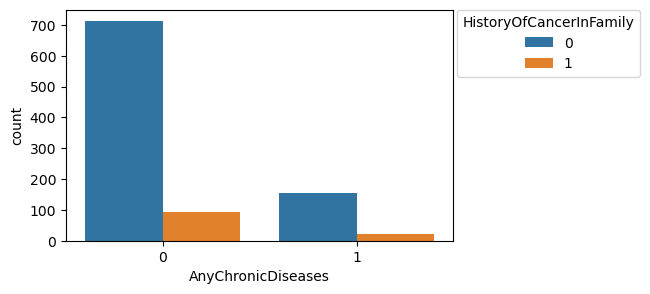

In [42]:
plt.figure(figsize=(5,3))
sns.countplot(x=df['AnyChronicDiseases'], hue = df['HistoryOfCancerInFamily'])

plt.legend(title= 'HistoryOfCancerInFamily', loc=(1.01,0.71))
plt.show()

In [43]:
# Chi-Square test
p_value = chi2_contingency(contingency_table)[1]
check_chi_value(p_value, alpha=0.05)

=== BOTH THE CATEGORICAL VARIABLES ARE INDEPENDENT ===
Chi-Square test result:  p-value = 0.8858081638149811


### Imp Insights: 
**Predictive Power:**

* Since there's a significant association, these variables may contain overlapping information. In a predictive model for insurance premium price, having both these features could lead to some redundancy.
* However, depending on the model type and feature selection process, the model might automatically down-weight one of these variables if they provide similar information.

**Feature Engineering:**

* We might need to consider combining these variables into a new feature that captures both the presence of chronic diseases and family cancer history. For example, a feature like "HighHealthRisk" could be created to reflect cases where either or both conditions are present.

**Multicollinearity Concerns:**

* If these variables are correlated, they might cause multicollinearity issues in certain types of models, such as linear regression. In this case, removing one of the correlated features or using dimensionality reduction (e.g., PCA) could help improve model stability.

# Q-9:  Is there an association between 2 categorical variable i.e.  'NumberOfMajorSurgeries' and 'HistoryOfCancerInFamily'

#### Define the null and alternate hypothesis

$H_0:$ NumberOfMajorSurgeries is independent of HistoryOfCancerInFamily.

$H_a:$ NumberOfMajorSurgeries depends on the variable HistoryOfCancerInFamily

In [44]:
from scipy.stats import chi2_contingency

contingency_table2 = pd.crosstab(df['NumberOfMajorSurgeries'], df['HistoryOfCancerInFamily'])

contingency_table2

HistoryOfCancerInFamily,0,1
NumberOfMajorSurgeries,,
0,479,0
1,268,104
2,107,12
3,16,0


In [45]:
# Chi-Square test
p_value = chi2_contingency(contingency_table2)[1]

check_chi_value(p_value, alpha=0.05)

=== THERE IS AN ASSOCIATION BETWEEN BOTH THE CATEGORICAL VARIABLES ===
Chi-Square test result:  p-value = 1.5930259415728302e-34


### We reject the null hypothesis in Chi-Square test, it means that we have sufficient statistical evidence to conclude that there is a significant association between the two categorical variables in the dataset:

### Interpretation of the Results:
**Null Hypothesis (H0):**

Null hypothesis states that the number of major surgeries is independent of the history of cancer in the family. In simpler terms, it suggests that knowing whether someone has a history of cancer in their family does not give any information about how many major surgeries they have had.

**Alternative Hypothesis (Ha):**

The alternative hypothesis claims that the number of major surgeries depends on the history of cancer in the family. This means there is an association; knowing about a person’s family cancer history provides insight into their number of major surgeries.

# Q-9:  Is there an association between 2 categorical variable i.e.  'NumberOfMajorSurgeries' and 'AnyChronicDiseases'

#### Define the null and alternate hypothesis

$H_0:$ NumberOfMajorSurgeries is independent of AnyChronicDiseases.

$H_a:$ NumberOfMajorSurgeries depends on the variable AnyChronicDiseases

In [46]:
from scipy.stats import chi2_contingency

contingency_table3 = pd.crosstab(df['NumberOfMajorSurgeries'], df['AnyChronicDiseases'])

# Chi-Square test
p_value = chi2_contingency(contingency_table3)[1]

check_chi_value(p_value, alpha=0.05)
print()
print(contingency_table3)

=== BOTH THE CATEGORICAL VARIABLES ARE INDEPENDENT ===
Chi-Square test result:  p-value = 0.10646907184162901

AnyChronicDiseases        0   1
NumberOfMajorSurgeries         
0                       396  83
1                       305  67
2                        91  28
3                        16   0


# Q-10:  Is there an association between 2 categorical variable i.e.  'NumberOfMajorSurgeries' and 'AnyTransplants'

#### Define the null and alternate hypothesis

$H_0:$ NumberOfMajorSurgeries is independent of AnyTransplants.

$H_a:$ NumberOfMajorSurgeries depends on the variable AnyTransplants

In [47]:
contingency_table4 = pd.crosstab(df['NumberOfMajorSurgeries'], df['AnyTransplants'])

# Chi-Square test
p_value = chi2_contingency(contingency_table4)[1]

check_chi_value(p_value, alpha=0.05) 

=== BOTH THE CATEGORICAL VARIABLES ARE INDEPENDENT ===
Chi-Square test result:  p-value = 0.8683678631155989


# Q-11:  Is there an association between 2 categorical variable i.e.  'HistoryOfCancerInFamily' and 'AnyTransplants'

#### Define the null and alternate hypothesis

$H_0:$ HistoryOfCancerInFamily is independent of AnyTransplants.

$H_a:$ HistoryOfCancerInFamily depends on the variable AnyTransplants

In [48]:
contingency_table5 = pd.crosstab(df['HistoryOfCancerInFamily'], df['AnyTransplants'])

contingency_table5

AnyTransplants,0,1
HistoryOfCancerInFamily,,
0,820,50
1,111,5


In [49]:
# Chi-Square test
p_value = chi2_contingency(contingency_table5)[1]

check_chi_value(p_value, alpha=0.05) 

=== BOTH THE CATEGORICAL VARIABLES ARE INDEPENDENT ===
Chi-Square test result:  p-value = 0.6759264929226854


# Feature Engineering

## 👉 **Creating a new Feature BMI and checking its relation with Premium Price**

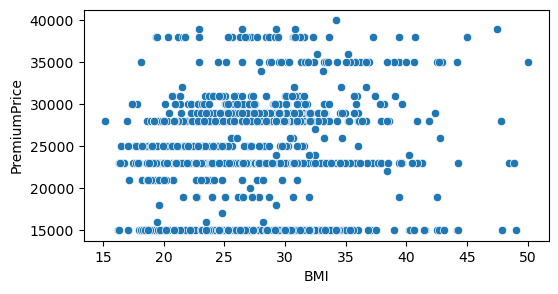

In [50]:
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

plt.figure(figsize=(6, 3))
sns.scatterplot(df['BMI'], df['PremiumPrice'])
plt.show()

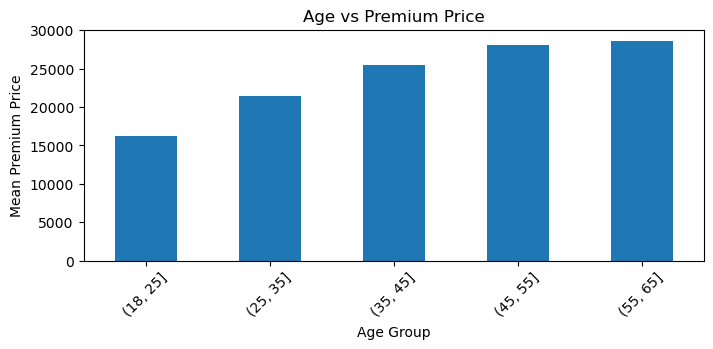

In [51]:
bins = [18, 25, 35, 45, 55, 65]
plt.figure(figsize=(8,3))
df.groupby(pd.cut(df['Age'], bins=bins))['PremiumPrice'].mean().plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Mean Premium Price')
plt.title('Age vs Premium Price')
plt.xticks(rotation=45)
plt.show()

# Regression Analysis

In [52]:
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,BMI
0,45,0,0,0,0,155,57,0,0,0,25000,23.725286
1,60,1,0,0,0,180,73,0,0,0,29000,22.530864
2,36,1,1,0,0,158,59,0,0,1,23000,23.634033
3,52,1,1,0,1,183,93,0,0,2,28000,27.770313
4,38,0,0,0,1,166,88,0,0,1,23000,31.934969
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000,23.458562
982,64,1,1,0,0,153,70,0,0,3,28000,29.903029
983,56,0,1,0,0,155,71,0,0,1,29000,29.552549
984,47,1,1,0,0,158,73,1,0,1,39000,29.242109


In [53]:
X = df.drop('PremiumPrice', axis=1)  # All columns except PremiumPrice
y = df['PremiumPrice']  # Target variable

In [55]:
import pickle

## Scaling the numerical continuous columns only and leaving the categorical columns as they are, since they are binary encoded and the column 'NumberofMajorSurgeries' is categorical with ordinal values(0,1,2,3)

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split



# Define the numerical and categorical columns
numerical_cols = ['Age', 'Height', 'Weight', 'BMI']
categorical_cols = [col for col in X.columns if col not in numerical_cols]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numerical columns only on training data
scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols])

# Save the scaler
with open('insurance_scaler.pkl', 'wb') as insurance_scaler_file:
    pickle.dump(scaler, insurance_scaler_file)

# Convert scaled data to DataFrames
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_cols, index=X_train.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_cols, index=X_test.index)

# Concatenate the scaled numerical data with the categorical data
X_train_final = pd.concat([X_train_scaled_numerical_df, X_train[categorical_cols]], axis=1)
X_test_final = pd.concat([X_test_scaled_numerical_df, X_test[categorical_cols]], axis=1)

## Checking VIF score for multi-colinearity

In [57]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df['Features'] = X_train_final.columns
vif_df['VIF Score'] = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]

print(vif_df)

                   Features  VIF Score
0                       Age   1.216655
1                    Height  27.210385
2                    Weight  64.048464
3                       BMI  85.454603
4                  Diabetes   1.465738
5     BloodPressureProblems   1.779854
6            AnyTransplants   1.047115
7        AnyChronicDiseases   1.157580
8            KnownAllergies   1.240816
9   HistoryOfCancerInFamily   1.222655
10   NumberOfMajorSurgeries   2.119505


### 👉 VIF score for BMI is the highest followed by Weight & Height as the feature BMI is created from Height & Weight. We might want to remove Weight & Height or one of them if we want to proceed with LInear Regression Model as our best model

## Regression Analysis

In [58]:
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train_final)  # Adds a constant term to the predictor
model = sm.OLS(y_train, X_train_sm).fit()

In [59]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           PremiumPrice   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     116.1
Date:                Sun, 10 Nov 2024   Prob (F-statistic):          1.11e-155
Time:                        15:44:28   Log-Likelihood:                -7611.9
No. Observations:                 788   AIC:                         1.525e+04
Df Residuals:                     776   BIC:                         1.530e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2

## Key Interpretations
#### 1. R-squared and Adjusted R-squared:

* **R-squared (0.622):** This means that approximately 62.2% of the variance in PremiumPrice can be explained by the predictors in the model.

* **Adjusted R-squared (0.617):** This adjusted value compensates for the number of predictors and indicates that the model is a good fit for the data.

#### 2. Coefficients and Statistical Significance (p-values):

* Each predictor has a coefficient, which indicates the direction and magnitude of its effect on PremiumPrice. A positive coefficient implies a direct relationship, while a negative coefficient implies an inverse relationship.
* **p-values (P>|t|):** These help us determine the statistical significance of each predictor. A p-value below 0.05 generally indicates that the predictor is statistically significant and has an impact on the target variable.

## Predictor Analysis
Here's a summary of the statistically significant predictors based on their p-values (assuming a significance level of 0.05):

* **Age:** Coefficient is 4573.66 with a p-value of 0.000. This indicates that for each additional year of age, the premium price increases by approximately 4576 units, holding other factors constant.
* **AnyTransplants:** Coefficient is 7498.55 with a p-value of 0.000, indicating a strong positive effect on premium. People who have had transplants have a substantially higher premium price.
* **AnyChronicDiseases:** Coefficient is 2544.59 with a p-value of 0.000. This suggests a strong positive impact, where having any chronic disease increases the premium price by approximately 2544 units.
* **Weight:** Coefficient is 1641.28 with a p-value of 0.000. This indicates that each additional unit of weight slightly increases the premium price.
* **HistoryOfCancerInFamily:** Coefficient is 2130.69 with a p-value of 0.000. This shows that a history of cancer in the family increases the premium price.
* **NumberOfMajorSurgeries:** Coefficient is -700 with a p-value of 0.001. This is a bit unusual, as it implies that more surgeries reduce the premium price, which may warrant further investigation to ensure there isn’t multicollinearity or that the model structure is valid.

Other predictors like **Diabetes, BloodPressureProblems, Height, and KnownAllergies** are not statistically significant at the 0.05 level, indicating they may not have a meaningful impact on PremiumPrice in this model.

### Hypothesis Testing with Linear Regression
To test hypotheses about the impact of each predictor on PremiumPrice, we can use the results from the p-values:

**Null Hypothesis:** The predictor has no impact on PremiumPrice (its coefficient is zero).

**Alternative Hypothesis:** The predictor has a significant impact on PremiumPrice (its coefficient is not zero).

**Height** has a coeff of -38 which is not so high and the p_value is greater than 0.05, which indicates that it is not a good predictor. We may want to drop it in the model training.

# Model Building
## ✍️ Model-1: Base Model with Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_final, y_train)

LinearRegression()

In [61]:
lr_model.score(X_test_final, y_test)

0.713646143964974

In [62]:
lr_model.coef_

array([4573.66031413, -447.98350617, 1641.27610066, -738.75738222,
       -399.90092402,  142.32249407, 7498.55305818, 2544.59068718,
        200.99000287, 2130.68544671, -700.21337224])

## R2, MSE & RMSE scores

In [63]:
train_score = lr_model.score(X_train_final, y_train)
test_score = lr_model.score(X_test_final, y_test)

print("Training R-squared score:", train_score)
print("Testing R-squared score:", test_score)

Training R-squared score: 0.6220932125044117
Testing R-squared score: 0.713646143964974


In [64]:
from sklearn.metrics import mean_squared_error

# Predict on testing data
y_pred = lr_model.predict(X_test_final)

# Calculate MSE and RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

MSE: 12210927.79
RMSE: 3494.41


## Assumptions check for Linear Model

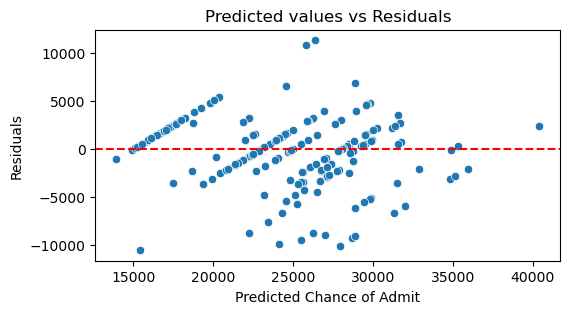

In [65]:
residuals = y_pred - y_test

plt.figure(figsize=(6,3))
sns.scatterplot(x = y_pred, y = residuals)
plt.xlabel("Predicted Chance of Admit")
plt.ylabel("Residuals")
plt.title("Predicted values vs Residuals")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [66]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_test_final)
lzip(name, test)

[('F statistic', 0.7080830437179452), ('p-value', 0.9463599717679799)]

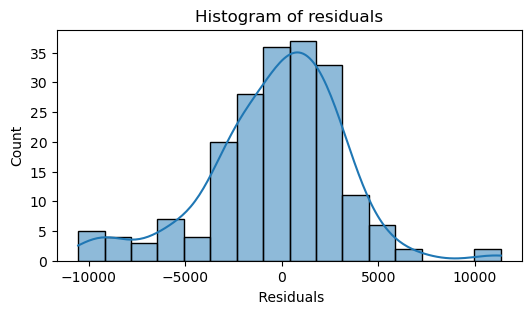

In [67]:
plt.figure(figsize=(6,3))
sns.histplot(residuals, kde=True)
plt.xlabel(" Residuals")
plt.title("Histogram of residuals")
plt.show()

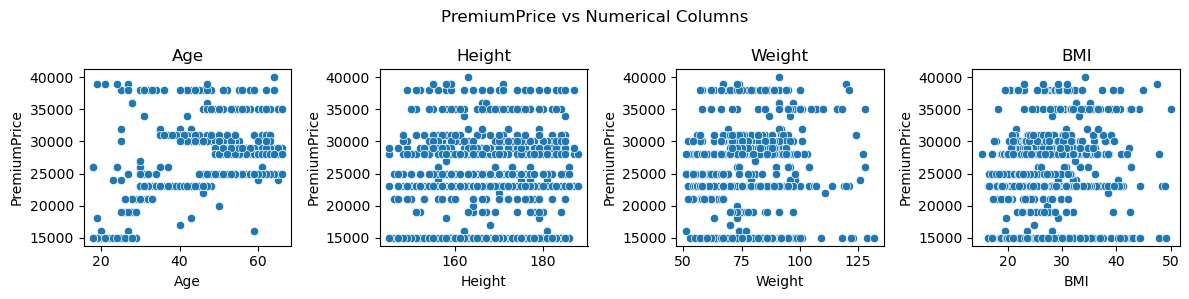

In [68]:
fig, axs = plt.subplots(1, len(numerical_cols), figsize=(12, 3))
plt.suptitle('PremiumPrice vs Numerical Columns')

# Iterate over numerical columns
for i, col in enumerate(numerical_cols):
    sns.scatterplot(df[col], df['PremiumPrice'], ax=axs[i])
    axs[i].set_title(col)

# Layout so plots do not overlap
plt.tight_layout()
plt.show()

## The independent variables do not have a linear relationship with the target variable. So Linear Regression is not the best model, but we have got the MSE/RMSE for the base model for comparison.

# ✍️ Model-2: Decision Tree 

In [69]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train_final, y_train)

DecisionTreeRegressor()

In [70]:
dt_model.score(X_test_final, y_test)

0.650846289676558

In [71]:
dt_model.score(X_train_final, y_train)

1.0

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error

In [73]:
y_pred_dt = dt_model.predict(X_test_final)

# Evaluate Decision Tree Regressor
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Regressor:")
print("MSE:", mse_dt)
print("R2:", r2_dt)

Decision Tree Regressor:
MSE: 14888888.888888888
R2: 0.650846289676558


# Hyperparameter Tuning of DT Model using Grid Search Cv

In [74]:
# Hyperparameter tuning for Decision Tree Regressor
dtr_params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10]
}
dtr_grid_search = GridSearchCV(DecisionTreeRegressor(), dtr_params, cv=5)
dtr_grid_search.fit(X_train_final, y_train)
print("Best parameters for Decision Tree Regressor:", dtr_grid_search.best_params_)
print("Best score for Decision Tree Regressor:", dtr_grid_search.best_score_)

Best parameters for Decision Tree Regressor: {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 5}
Best score for Decision Tree Regressor: 0.7175071991392543


In [75]:
# Hyperparameter tuning for Decision Tree Regressor
dtr_params = {
    'max_depth': [12, 15, 20],
    'min_samples_split': [10, 15, 18, 20],
    'min_samples_leaf': [3, 5, 7]
}
dtr_grid_search = GridSearchCV(DecisionTreeRegressor(), dtr_params, cv=5)
dtr_grid_search.fit(X_train_final, y_train)
print("Best parameters for Decision Tree Regressor:", dtr_grid_search.best_params_)
print("Best score for Decision Tree Regressor:", dtr_grid_search.best_score_)

Best parameters for Decision Tree Regressor: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20}
Best score for Decision Tree Regressor: 0.7303083810129983


In [76]:
# Hyperparameter tuning for Decision Tree Regressor
dtr_params = {
    'max_depth': [18, 20, 22],
    'min_samples_split': [15, 18, 20],
    'min_samples_leaf': [1, 3, 5, 7, 9]
}
dtr_grid_search = GridSearchCV(DecisionTreeRegressor(), dtr_params, cv=5)
dtr_grid_search.fit(X_train_final, y_train)
print("Best parameters for Decision Tree Regressor:", dtr_grid_search.best_params_)
print("Best score for Decision Tree Regressor:", dtr_grid_search.best_score_)

Best parameters for Decision Tree Regressor: {'max_depth': 22, 'min_samples_leaf': 9, 'min_samples_split': 15}
Best score for Decision Tree Regressor: 0.7381801514868709


In [77]:
best_model = DecisionTreeRegressor(random_state=7, max_depth = 18, min_samples_split = 15, min_samples_leaf = 9)

In [78]:
from sklearn.model_selection import KFold, cross_validate

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

# Perform KFold cross-validation
cv_acc_results = cross_validate(best_model, X_train_final, y_train, cv=kfold, scoring='neg_mean_squared_error', return_train_score=True)

# Print KFold results
print(f"K-Fold -ve MSE Mean: Train: {cv_acc_results['train_score'].mean()*-1} Validation: {cv_acc_results['test_score'].mean()*-1}")
print('***************')

K-Fold -ve MSE Mean: Train: 7167992.13226225 Validation: 10358807.46222429
***************


In [79]:
best_model.fit(X_train_final, y_train)
train_score = best_model.score(X_train_final, y_train)
print('R2 score of Train data:', train_score)

R2 score of Train data: 0.8189324648210665


In [80]:
best_y_pred = best_model.predict(X_test_final)

# Evaluate Decision Tree Regressor
mse = mean_squared_error(y_test, best_y_pred)
r2 = r2_score(y_test, best_y_pred)
rmse = rmse = np.sqrt(mse)
mape_dt = mean_absolute_percentage_error(y_test, best_y_pred) * 100

print("Decision Tree Regressor:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print("R2:", r2)
print(f"MAPE: {mape_dt:.2f}%")

Decision Tree Regressor:
MSE: 5411816.88
RMSE: 2326.33
R2: 0.8730895261678127
MAPE: 4.70%


## MSE and Score Interpretation:

#### MSE (Mean Squared Error): 5411816.88 (test_data from DT), 12221661.71 (Linear Model)
* Lower MSE values indicate better model performance.
* Decision Tree Regressor's MSE is significantly lower than Linear Model's MSE.
#### RMSE (Root Mean Squared Error): 2326.33 (Decision Tree Regressor), 3495.95 (Linear Model)
* RMSE represents the average difference between predicted and actual values.
* Decision Tree Regressor's RMSE is approximately 1000 units lower than Linear Model's RMSE.
#### R2 Score (Coefficient of Determination): 0.8730 (Decision Tree Regressor), 0.7134 (Linear Model) For Test_Data
* R2 measures the proportion of variance explained by the model.
* Decision Tree Regressor's R2 score is higher, indicating better goodness-of-fit.
#### MAPE (Mean Absolute Percentage Error) of 4.70% indicates that, on average, the model's predictions deviate by approximately 4.7% from the actual values. This is relatively low and suggests that the model is performing well in terms of prediction accuracy.
## Insights:
* Decision Tree Regressor outperforms Linear Model in terms of MSE, RMSE, and R2 score.
* Decision Tree Regressor's performance is more consistent across KFold train and validation sets.

# Feature Importance as per Decision Tree Model

In [ ]:
best_model.feature_importances_

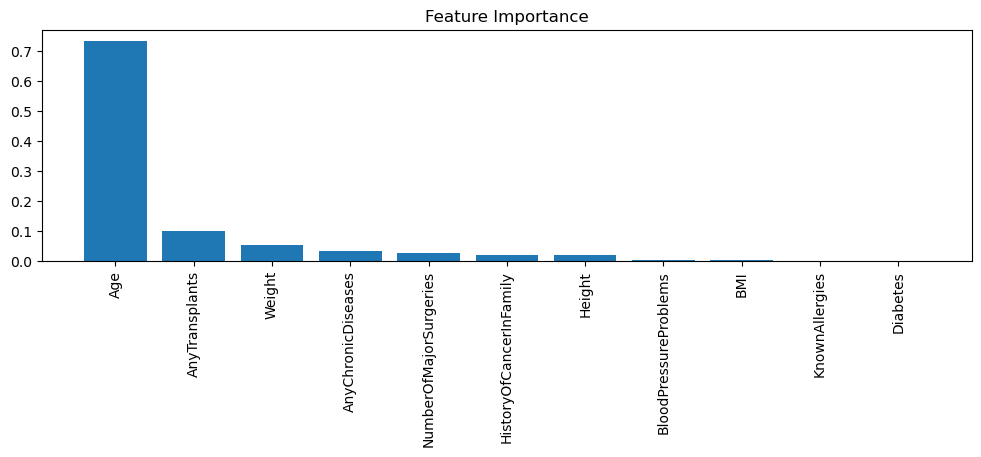

In [81]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train_final.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(12, 3)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train_final.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train_final.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## Least Important Features:
If certain features have very low importance, we can consider removing them to simplify the model, reduce noise, and possibly improve performance. However, removing features should ideally be done based on domain knowledge and after checking if performance improves.

# As per our EDA and model's Feature importance, column 'KnownAllergies' might not be an important predictor. Let's check the performance by removing it

In [82]:
best_model_2 = DecisionTreeRegressor(random_state=7, max_depth = 18, min_samples_split = 15, min_samples_leaf = 9)

X_train_dropped = X_train_final.drop(columns=['KnownAllergies'])

best_model_2.fit(X_train_dropped, y_train)
train_score = best_model_2.score(X_train_dropped, y_train)
print('R2 score of Train data:', train_score)

R2 score of Train data: 0.8189322122365785


In [83]:
X_test_dropped = X_test_final.drop(columns=['KnownAllergies'])
y_pred_dropped = best_model_2.predict(X_test_dropped)

# Evaluate Decision Tree Regressor
mse = mean_squared_error(y_test, y_pred_dropped)
r2 = r2_score(y_test, y_pred_dropped)
rmse = rmse = np.sqrt(mse)
mape_dropped = mean_absolute_percentage_error(y_test, y_pred_dropped) * 100

print("Decision Tree Regressor:")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print("R2:", r2)
print(f"MAPE: {mape_dropped:.2f}%")

Decision Tree Regressor:
MSE: 5411810.21
RMSE: 2326.33
R2: 0.87308968250747
MAPE: 4.70%


## 👉 By removing the feature, DT model's performance does not improve. We should ratain all the variables

## 👇 Plotting Residuals from Decision Tree Model

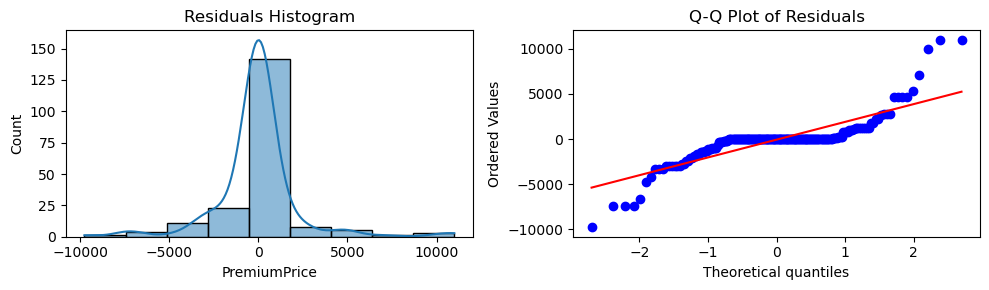

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot histogram of residuals on the first subplot
sns.histplot(y_test - best_y_pred, ax=axes[0], kde=True)
axes[0].set_title("Residuals Histogram")

# Plot Q-Q plot of residuals on the second subplot
stats.probplot(y_test - best_y_pred, plot=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

## Interpretation:
The histogram of residuals (y_test - y_pred) helps assess model performance. If the residuals are centered around zero with a symmetric, bell-shaped distribution, it indicates the model is unbiased and the errors are random, which is desirable. A narrow spread suggests good model accuracy, while a wider spread indicates more error variability. Significant residuals far from zero could indicate outliers or prediction issues. Overall, a well-behaved residual distribution indicates the model fits the data well, whereas skewness, outliers, or wide dispersion suggest areas for improvement.

# ✍️ Model-3: Random Forest Model & its Hyperparameters (Bagging)

In [85]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
params = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, 15], 'max_features' : [7,8,9,10]}
grid_search = GridSearchCV(rf_model, params, cv=5)
grid_search.fit(X_train_final, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 8, 'n_estimators': 50}
Best score: 0.7518571160181233


In [86]:
params = {'n_estimators': [150, 175, 200, 225], 'max_depth': [8, 10, 12], 'max_features' : [7,8,9,10]}
grid_search = GridSearchCV(rf_model, params, cv=5)
grid_search.fit(X_train_final, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'max_depth': 10, 'max_features': 8, 'n_estimators': 150}
Best score: 0.7503733527517359


## With multiple tries, I have decided to keep the parameters as: {'max_depth': 10, 'max_features': 10, 'n_estimators': 200}

In [87]:
best_rf_model = RandomForestRegressor(max_depth=10, n_estimators= 200)
best_rf_model.fit(X_train_final, y_train)
best_rf_model.score(X_train_final, y_train)

0.9630280733573503

In [88]:
train_score = best_rf_model.score(X_train_final, y_train)
print(f"R2 score of Train data: {train_score:.2f}")

R2 score of Train data: 0.96


In [89]:
test = best_rf_model.score(X_test_final, y_test)
print(f"R2 score of Test data: {test:.2f}")

R2 score of Test data: 0.90


## MSE, RMSE & MAPE have also reduced compared to Decision Tree Model

In [106]:
# Evaluate Decision Tree Regressor
rf_y_pred = best_rf_model.predict(X_test_final)

mse_rf = mean_squared_error(y_test, rf_y_pred)
rmse_rf = np.sqrt(mse_rf)
mape_rf = mean_absolute_percentage_error(y_test, rf_y_pred) * 100

print("Random Forest Regressor:")
print(f"MSE: {mse_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")
print(f"MAPE: {mape_rf:.2f}%")

Random Forest Regressor:
MSE: 4288951.66
RMSE: 2070.98
MAPE: 4.32%


### R-squared Interpretation:
* R2 measures the proportion of the variance in the dependent variable (target) that's predictable from the independent variables (features). It ranges from 0 to 1.
### RF Results:
* **Train R2: 0.96:** The model explains approximately 96% of the variance in the training data.
* **Test R2: 0.90:** The model explains approximately 90% of the variance in the testing data.

### Key Takeaways:
* **High R2 values:** Both train and test R2 values are high, indicating a strong fit.
* **Small gap between train and test R2:** The difference between train and test R2 (0.96 - 0.90 = 0.06) is relatively small, suggesting:
* **Minimal overfitting:** The model generalizes well to unseen data.
* **Good model performance:** The model is effective in predicting the target variable.

### Reducing Overfit:
* We can reduce the complexity of the model by more tuning of hyperparameters:
### Random Forest specific techniques:
* **Increase n_estimators:** More trees can reduce overfitting.
* **Decrease max_depth:** Shallower trees reduce complexity.
* **Increase min_samples_split:** Require more samples for splits.
* **Increase min_samples_leaf:** Require more samples in leaves.

## Feature Importance by Random Forest Model

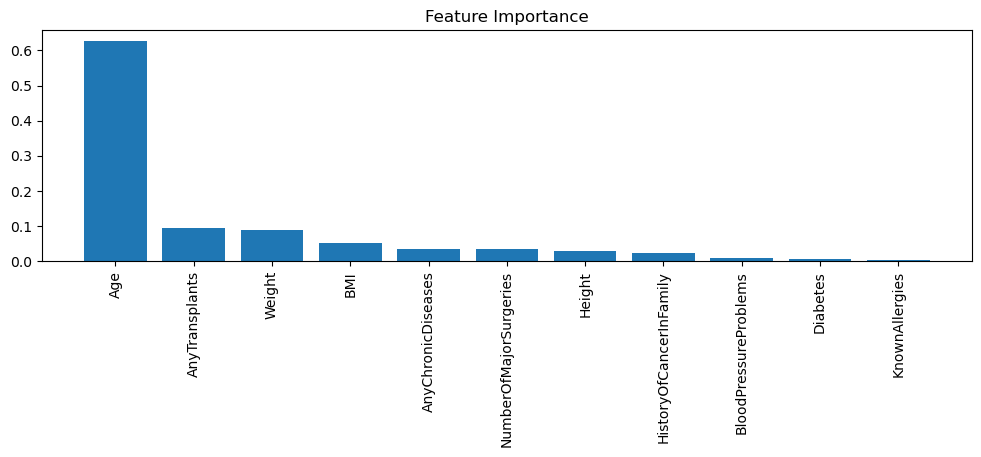

In [91]:
# Feature Importance
importances = best_rf_model.feature_importances_

indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train_final.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances

plt.figure(figsize=(12, 3)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train_final.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train_final.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

## Plotting Residuals from Random Forest Model

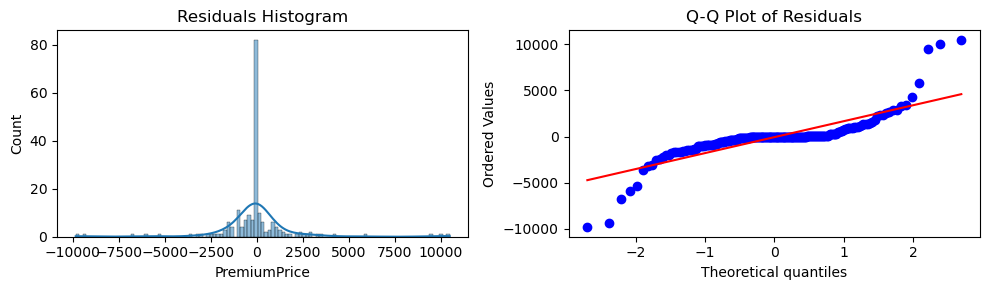

In [92]:
rf_y_pred = best_rf_model.predict(X_test_final)
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot histogram of residuals on the first subplot
sns.histplot(y_test - rf_y_pred, ax=axes[0], kde=True)
axes[0].set_title("Residuals Histogram")

# Plot Q-Q plot of residuals on the second subplot
stats.probplot(y_test - rf_y_pred, plot=axes[1])
axes[1].set_title("Q-Q Plot of Residuals")

plt.tight_layout()
plt.show()

## Interpretation:
The histogram of residuals (y_test - y_pred) helps assess model performance. If the residuals are centered around zero with a symmetric, bell-shaped distribution, it indicates the model is unbiased and the errors are random, which is desirable. A narrow spread suggests good model accuracy, while a wider spread indicates more error variability. Significant residuals far from zero could indicate outliers or prediction issues. Overall, a well-behaved residual distribution indicates the model fits the data well, whereas skewness, outliers, or wide dispersion suggest areas for improvement.

# ✍️ Model-4: Gradient Boosting & its Parameters tuning with RandomizedSearchCV

In [93]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb_model = GradientBoostingRegressor()

param_distributions = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 5, 7]
}

random_search = RandomizedSearchCV(gb_model, param_distributions, cv=5, n_iter=50)
random_search.fit(X_train_final, y_train)
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Best score: 0.7165279248280474


In [94]:
param_distributions = {
    'n_estimators': [40,50,60],
    'learning_rate': [0.1],
    'max_depth': [2,3,4]
}

random_search = RandomizedSearchCV(gb_model, param_distributions, cv=5, n_iter=50)
random_search.fit(X_train_final, y_train)
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Best parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Best score: 0.7158607231025766


In [95]:
best_gb_model = GradientBoostingRegressor(n_estimators=40, max_depth=4, learning_rate=0.1)
best_gb_model.fit(X_train_final, y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=40)

In [96]:
best_gb_model.score(X_train_final, y_train)

0.8969480299768223

In [97]:
best_gb_model.score(X_test_final, y_test)

0.8794256126418889

# Evaluating GB Regressor

In [107]:
gb_y_pred = best_gb_model.predict(X_test_final)

mse_gb = mean_squared_error(y_test, gb_y_pred)
rmse_gb = np.sqrt(mse_gb)
mape_gb = mean_absolute_percentage_error(y_test, gb_y_pred) * 100

print("Gradiant Boosting Regressor:")
print(f"MSE: {mse_gb:.2f}")
print(f"RMSE: {rmse_gb:.2f}")
print(f"MAPE: {mape_gb:.2f}%")

Gradiant Boosting Regressor:
MSE: 5141628.47
RMSE: 2267.52
MAPE: 5.84%


## Performance has reduced compared to Random Forest Model.
## So Random Forest is the best model so far which gives a MAPE value of 4.32%: Model is actually able to make correct prediction except the 4.32% deviation

# Prediction interval for Random Forest Model

In [99]:
predictions = np.array([tree.predict(X_test_final) for tree in best_rf_model.estimators_])
lower_bound = np.percentile(predictions, 2.5, axis=0)
upper_bound = np.percentile(predictions, 97.5, axis=0)
mean_prediction = np.mean(predictions, axis=0)
# Print predictions with intervals
for i in range(5):
    print(f"Actual: {y_test.iloc[i]:.2f}, Predicted: {mean_prediction[i]:.2f}, Interval: ({lower_bound[i]:.2f}, {upper_bound[i]:.2f})")

Actual: 31000.00, Predicted: 29908.27, Interval: (20000.00, 31000.00)
Actual: 31000.00, Predicted: 30045.00, Interval: (25000.00, 31000.00)
Actual: 29000.00, Predicted: 30563.90, Interval: (28610.75, 35000.00)
Actual: 15000.00, Predicted: 17212.50, Interval: (15000.00, 32000.00)
Actual: 23000.00, Predicted: 23874.39, Interval: (21995.00, 30225.00)


* "Our Random Forest model's prediction reliability is demonstrated through 95% prediction intervals, calculated from the 2.5th and 97.5th percentiles of individual tree predictions. These intervals provide a probabilistic range for predicted values."

# SHAP values to explain the influence of each feature on the prediction.

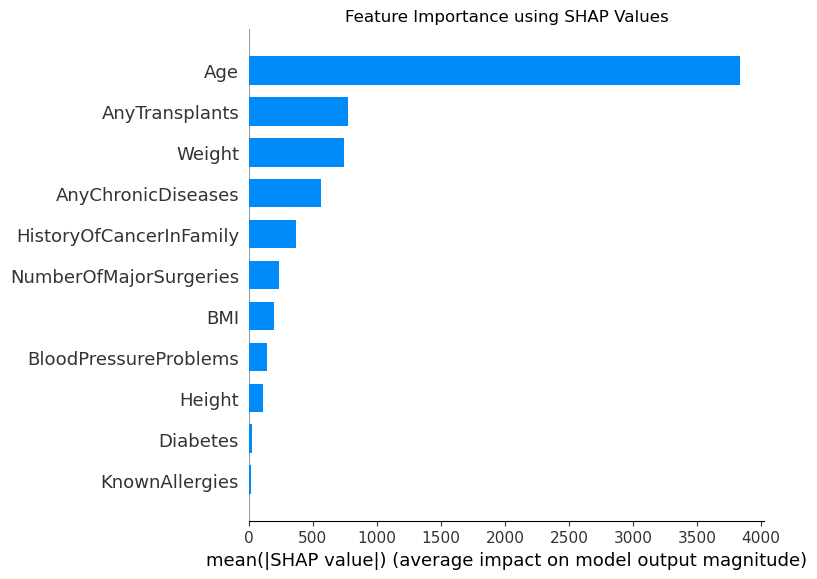

In [100]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_rf_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_final)

# Plot feature importance
plt.title("Feature Importance using SHAP Values")
shap.summary_plot(shap_values, X_test_final, plot_type="bar")

plt.show()

## How SHAP values work
* Calculate the contribution of each feature to the predicted output.
* Assign a SHAP value representing the feature's contribution.

# Key Insights Based on SHAP Values:
## Feature Importance:

* **Age** has the highest impact on the model's predictions, as shown by both the mean SHAP values and the SHAP summary plot. This indicates that age is a critical factor in predicting premium prices.
* **AnyTransplants, Weight, and AnyChronicDiseases** are also significant factors, albeit with less influence than age. They show a meaningful effect on predictions, contributing to the model's understanding of premium price variability.
* **HistoryOfCancerInFamily and NumberOfMajorSurgeries** come next in terms of impact. These features are important but have a smaller effect than the top four.

## Potential Business Interpretation:

* **From a business perspective,** the model’s output highlights Age, AnyTransplants, Weight, and ChronicDiseases as major cost-driving factors. This suggests that for setting insurance premiums, these variables are crucial and may warrant closer scrutiny or intervention. For instance, older clients or those with chronic diseases may be offered additional health support or wellness programs to help manage potential risk factors, aligning with higher premium costs.
* **Risk Management:** Identifying high-risk groups based on these features could allow the company to provide more tailored insurance plans, focusing on preventive care for customers likely to have higher health expenses. This could not only mitigate risks but also enhance customer satisfaction by offering personalized solutions.

## Saving the model in pickle file for deployment purpose

In [101]:
import pickle

# Save the trained model using pickle
with open('insurance_model.pkl', 'wb') as rf_model_file:
    pickle.dump(best_rf_model, rf_model_file)

print("Model has been saved to insurance_model.pkl")

Model has been saved to insurance_model.pkl


# Key Insights and Business Recommendations:
### Age-Driven Premium Adjustments:

* **Insight:** Age is the most influential predictor of premium prices. Older customers generally have higher premiums due to increased health risks.
* **Recommendation:** Introduce tiered premium structures that adjust with age groups. Consider developing additional products targeting different age demographics, such as wellness programs for seniors or fitness-based incentives for younger clients.

### Health Condition-Based Premium Differentiation:

* **Insight:** Chronic diseases, transplants, and family cancer history significantly impact premium prices.
* **Recommendation:** Consider customized premium plans that reflect the customer’s health background. Additionally, targeted health intervention programs, like screenings for chronic diseases or lifestyle management for high-risk individuals, could help reduce claims while improving customer loyalty.

### Medical History and Premium Pricing:

* **Insight:** Diabetes and blood pressure issues are prevalent among customers and are associated with higher premiums.
* **Recommendation:** Develop a specialized premium pricing scheme for customers with chronic conditions like diabetes and blood pressure. Introducing preventive care plans and regular health check-ups could help manage the health risks associated with these conditions.

### Premium Adjustment for Surgical History:

* **Insight:** Number of major surgeries shows an unexpected inverse correlation with premium price, potentially due to multicollinearity.
* **Recommendation:** Review the data on surgeries more closely to confirm if surgical history genuinely affects premiums. Ensure the underwriting process takes into account the context and type of surgeries, as this might better inform risk assessments and premium calculations.

### Physical Attributes (Height and Weight) Impact:

* **Insight:** Weight has a positive association with premium price, suggesting it contributes to the health risk profile.
* **Recommendation:** Implement wellness programs or discounts for customers who achieve a healthier BMI, encouraging them to maintain a healthy weight. This could reduce health-related claims over time and align premiums with customer health outcomes.

### Feature Importance and Model Refinement:

* **Insight:** Known allergies and minor health issues had limited predictive power, showing minimal impact on premium pricing.
* **Recommendation:** Streamline the application process by simplifying questionnaires and removing non-predictive questions (like known allergies). This will reduce data collection costs and customer response time without compromising model accuracy.

### Targeted Product Development and Upselling Opportunities:

* **Insight:**Customers with chronic conditions, history of cancer in the family, or frequent surgeries represent higher-risk categories.
* **Recommendation:** Design specific insurance products for high-risk individuals that offer extra health benefits or incentives for preventative care. Upsell these products to individuals identified as high-risk based on model predictions.

### Implementing Predictive Monitoring Using SHAP Values:

* **Insight:** The SHAP values analysis highlights Age, Transplants, Weight, and Chronic Diseases as critical factors influencing premium predictions.
* **Recommendation:** Use SHAP values to monitor customer health data and identify those at risk of premium increases. This could allow the company to proactively reach out to these customers with health programs aimed at lowering their health risks, potentially keeping their premiums stable while fostering customer loyalty.

### Model Performance and Predictive Reliability:

Model Selection: The Random Forest model demonstrated the highest accuracy and the lowest error rates (MSE, RMSE, and MAPE). Its performance, with a low MAPE of 4.32%, suggests that it can provide reliable premium predictions.
Confidence Intervals: The 95% prediction intervals indicate that the model's predictions are robust, providing confidence in the premium estimates.

## Final Recommendations:
* **Adopt the Random Forest Model:** Implement the Random Forest model in production for premium predictions, given its high accuracy and reliability in the current dataset.
* **Evaluate Model Regularly:** Ensure periodic re-evaluation of the model's performance as more data is collected to maintain prediction accuracy.
* **Use Insights for Policy Optimization:** Leverage insights on high-impact features to create premium tiers, personalized plans, and proactive health engagement strategies that align premiums with individual health profiles.

**These recommendations are based on both the exploratory analysis and model insights, providing a data-driven approach to optimize premium pricing, enhance customer satisfaction, and manage risk effectively.**